# Практическая 4

Импорт всех необходимых библиотек и датасета своего варианта.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn import metrics

df = pd.read_csv("../pr4/vgsales/vgsales_14.csv")
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,10689,Generator Rex: Agent of Providence,3DS,2011.0,Action,Activision,0.07,0.02,0.00,0.01,0.10
1,10856,FIFA Street 3,DS,2008.0,Sports,Electronic Arts,0.07,0.02,0.00,0.01,0.09
2,12101,Family Trainer: Treasure Adventure,Wii,2010.0,Sports,Namco Bandai Games,0.00,0.06,0.00,0.01,0.07
3,2973,Shark Tale,GBA,2004.0,Action,Activision,0.49,0.18,0.00,0.01,0.68
4,8504,Medieval Games,Wii,2009.0,Action,Vir2L Studios,0.14,0.01,0.00,0.01,0.16
...,...,...,...,...,...,...,...,...,...,...,...
548,1004,Star Wars: Starfighter,PS2,2001.0,Simulation,Activision,0.61,0.87,0.02,0.26,1.76
549,15227,Umineko no Naku Koro ni: Majo to Suiri no Rinb...,PS3,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
550,15993,Shinseiki Evangelion: Battle Orchestra Portable,PSP,2009.0,Fighting,Broccoli,0.00,0.00,0.01,0.00,0.01
551,5753,Cabela's Outdoor Adventures (2009),Wii,2009.0,Sports,Activision Value,0.29,0.00,0.00,0.02,0.31


Удаление лишних столбцов датасета и преобразование при помощи функции train_test_split.

In [5]:
df['Is_Action'] = (df['Genre'] == 'Action').astype(int)
df.drop(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher'], axis=1, inplace=True)
X = df[['EU_Sales','Global_Sales']]
y = df['Is_Action']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

Здесь происходит построение дерева решений и его визуализация с помощью функции plot_tree.

[Text(0.40090560449574725, 0.9705882352941176, 'x[0] <= 0.005\ngini = 0.357\nsamples = 442\nvalue = [339, 103]'),
 Text(0.11300121506682867, 0.9117647058823529, 'x[1] <= 2.21\ngini = 0.164\nsamples = 133\nvalue = [121, 12]'),
 Text(0.07533414337788578, 0.8529411764705882, 'x[1] <= 0.055\ngini = 0.154\nsamples = 131\nvalue = [120, 11]'),
 Text(0.02916160388821385, 0.7941176470588235, 'x[1] <= 0.015\ngini = 0.237\nsamples = 51\nvalue = [44, 7]'),
 Text(0.019441069258809233, 0.7352941176470589, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.038882138517618466, 0.7352941176470589, 'x[1] <= 0.035\ngini = 0.263\nsamples = 45\nvalue = [38, 7]'),
 Text(0.019441069258809233, 0.6764705882352942, 'x[1] <= 0.025\ngini = 0.302\nsamples = 27\nvalue = [22, 5]'),
 Text(0.009720534629404616, 0.6176470588235294, 'gini = 0.231\nsamples = 15\nvalue = [13, 2]'),
 Text(0.02916160388821385, 0.6176470588235294, 'gini = 0.375\nsamples = 12\nvalue = [9, 3]'),
 Text(0.0583232077764277, 0.6764705882352942, '

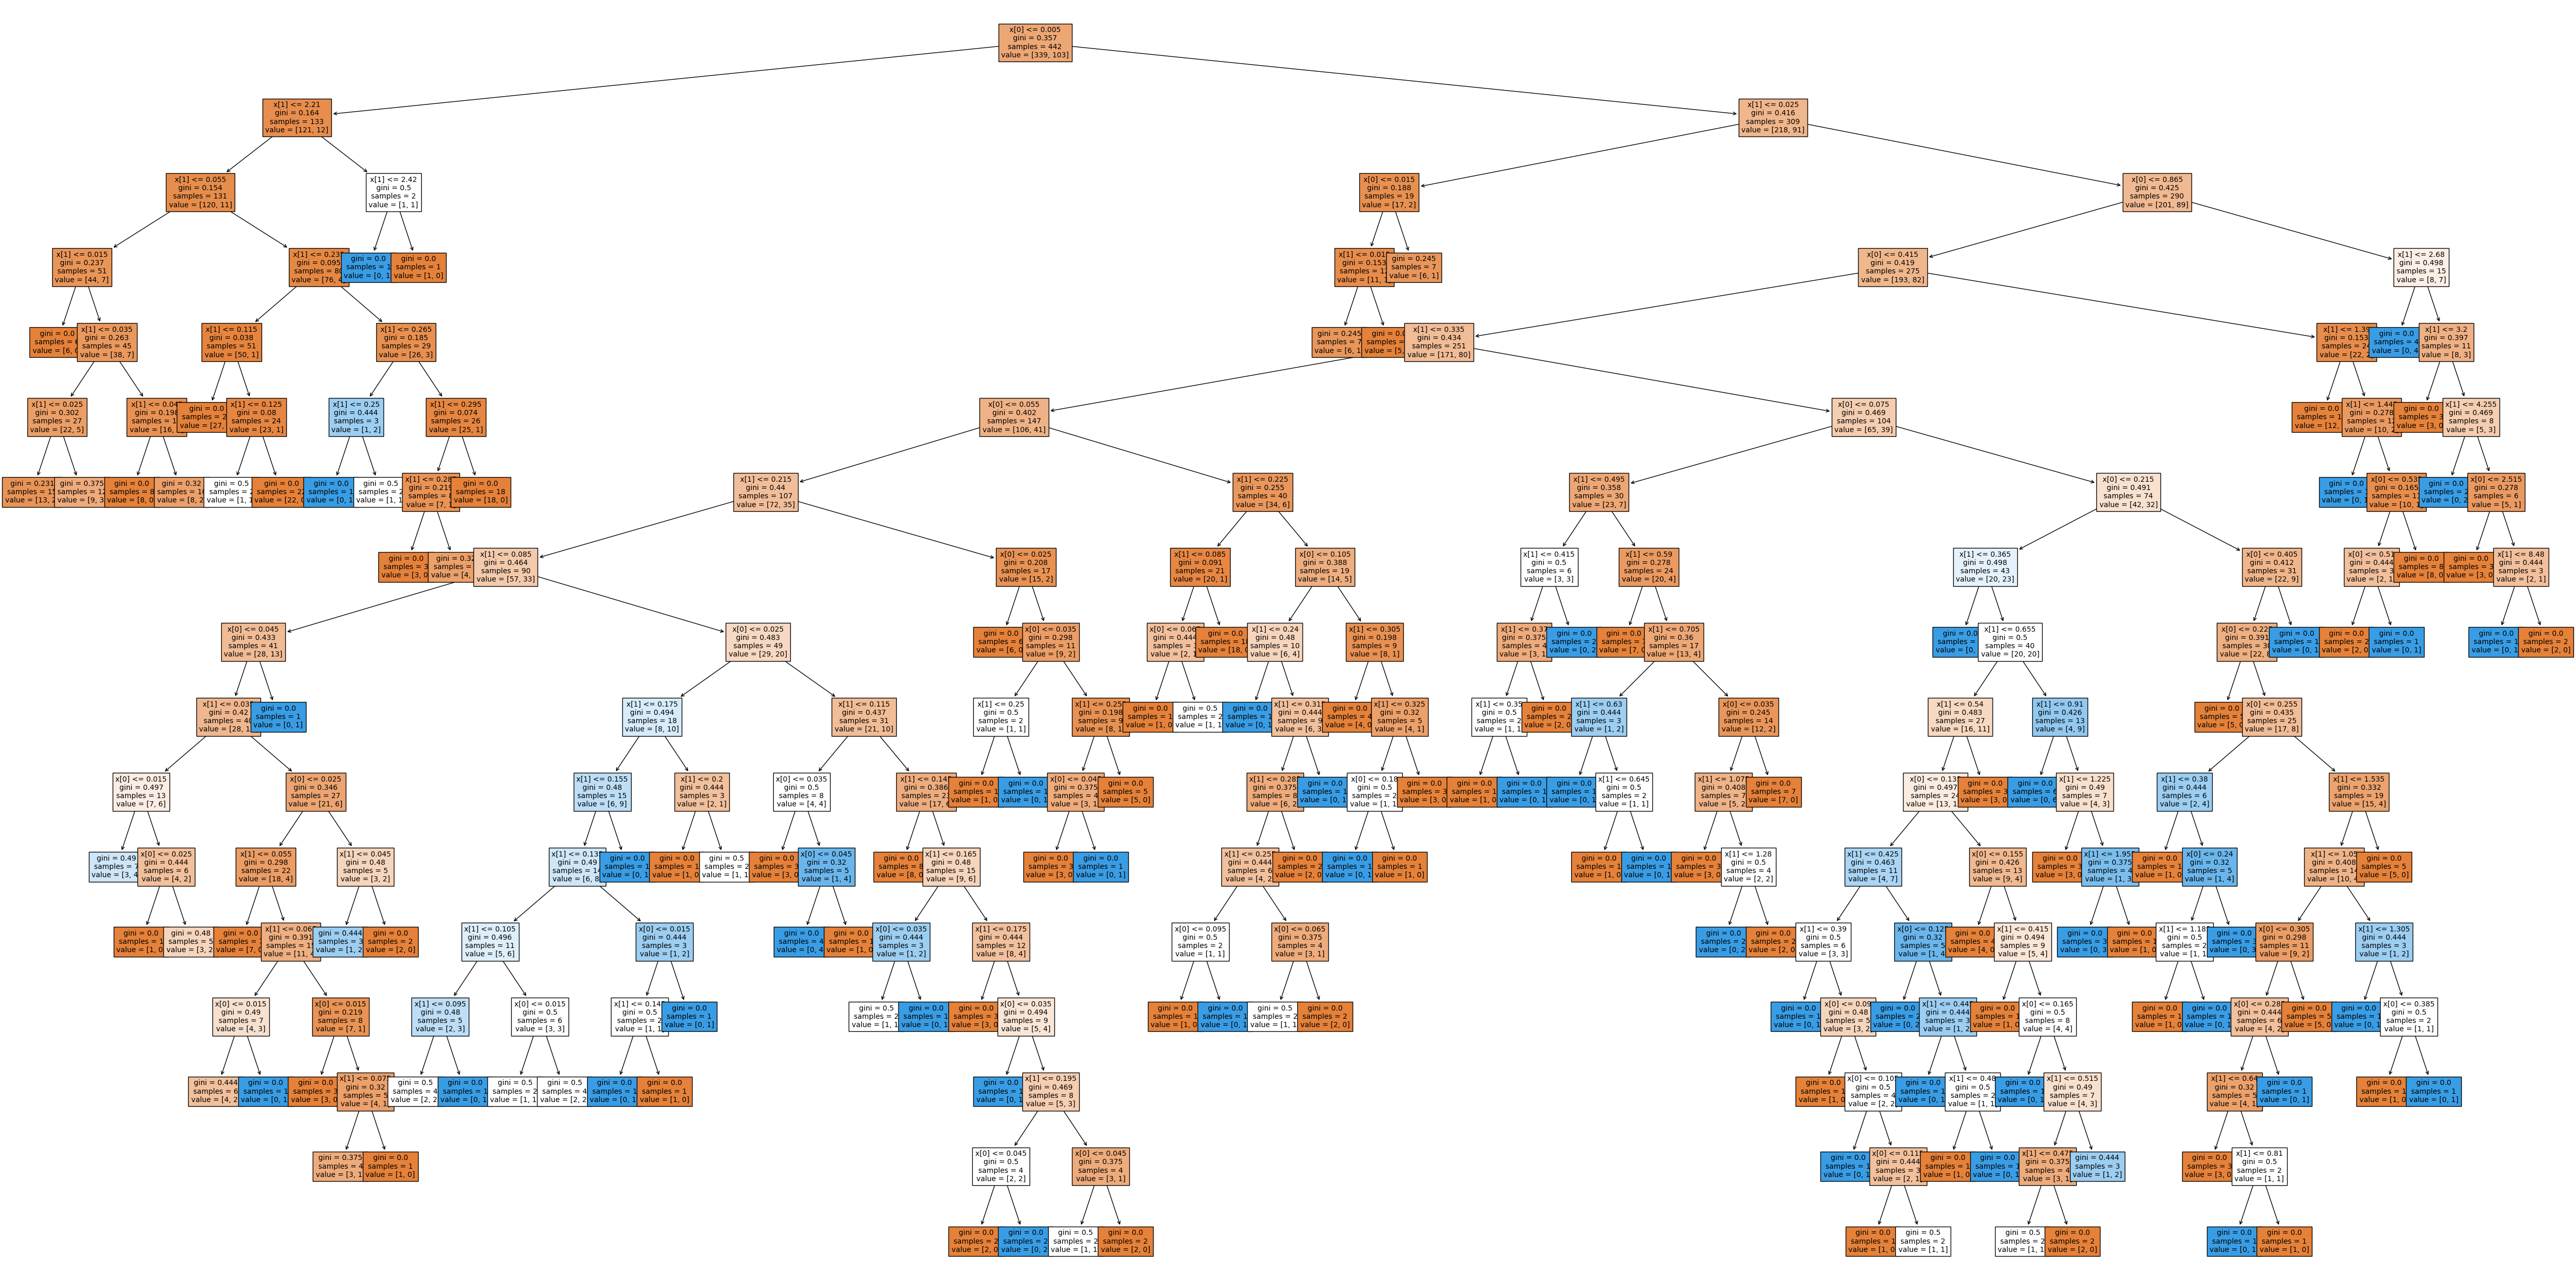

In [3]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
plt.figure(figsize=(64, 32))
plot_tree(dtc, filled=True, fontsize=10)

Вычисление и вывод метрик построенного дерева.

In [240]:
y_pred = dtc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Матрица:\n', cm)
print('Точность:', accuracy)
print("Точность вторым методом", metrics.accuracy_score(y_test, y_pred))
print('Чувствительность:', recall)
print('Аккуратность:', precision)
print('Финал:', f1)

Матрица:
 [[83 14]
 [13  1]]
Точность: 0.7567567567567568
Точность вторым методом 0.7567567567567568
Чувствительность: 0.07142857142857142
Аккуратность: 0.06666666666666667
Финал: 0.0689655172413793


Создание и построение дерева с новыми параметрами.

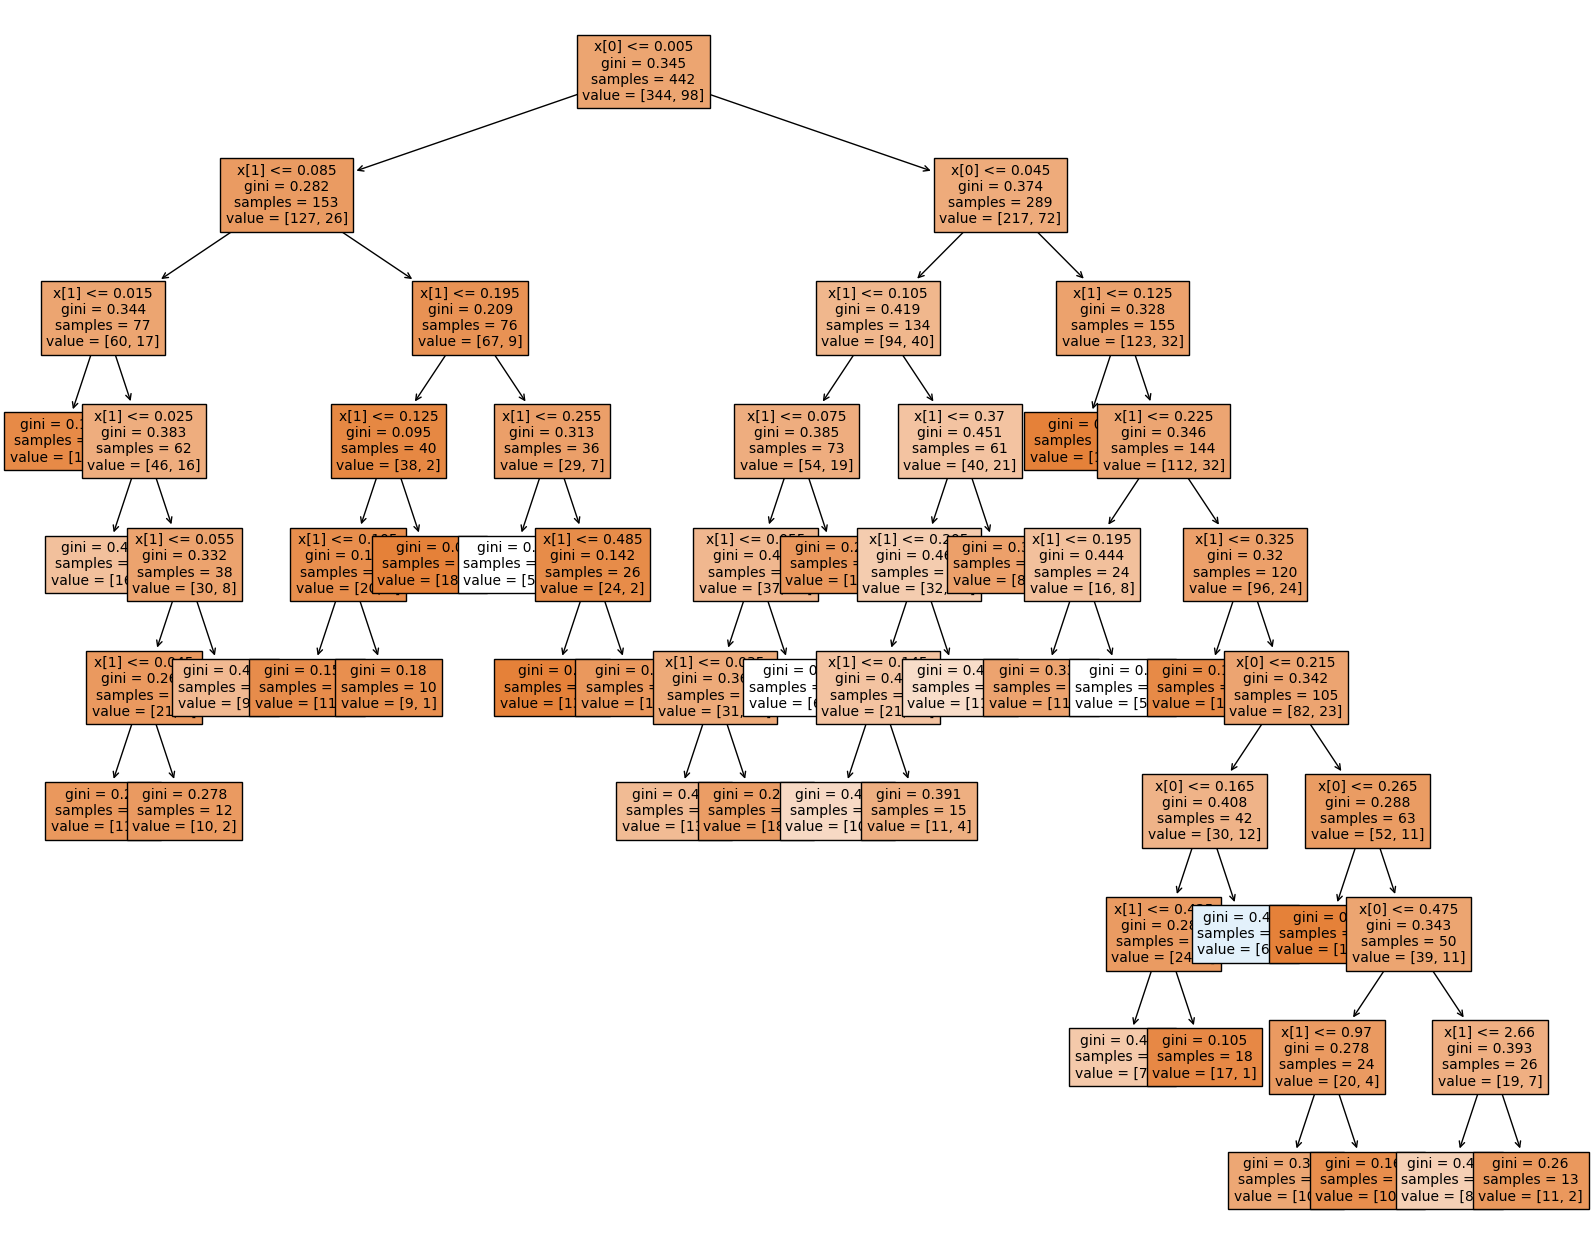

In [241]:
dtc_tuned = DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, max_leaf_nodes=200)
dtc_tuned.fit(X_train, y_train)
plt.figure(figsize=(20, 16))
plot_tree(dtc_tuned, filled=True, fontsize=10)
plt.show()

Вычисление и вывод метрик дерева с новыми параметрами.

In [242]:
y_pred_tuned = dtc_tuned.predict(X_test)

cm_tuned = confusion_matrix(y_test, y_pred_tuned)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)

print('Матрица 2:\n', cm_tuned)
print('Точность:', accuracy_tuned)
print("Точность вторым методом", metrics.accuracy_score(y_test, y_pred_tuned))
print('Чувствительность:', recall_tuned)
print('Аккуратность:', precision_tuned)
print('Финал:', f1_tuned)

Матрица 2:
 [[92  5]
 [12  2]]
Точность: 0.8468468468468469
Точность вторым методом 0.8468468468468469
Чувствительность: 0.14285714285714285
Аккуратность: 0.2857142857142857
Финал: 0.19047619047619047
